# **Data Understanding**

## **Data Loading**

Dataset yang digunakan pada proyek ini, merupakan data yang tersedia pada situs penyedia data [Kaggle](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset)

Disini saya mengunakan API untuk mendapatkan data

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d arashnic/book-recommendation-dataset

 21% 5.00M/23.8M [00:00<00:01, 17.4MB/s]
100% 23.8M/23.8M [00:00<00:00, 66.8MB/s]


Import library yang dibutuhkan

In [6]:
import zipfile
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

Karna data yang diperoleh dari API berupa file .zip, maka perlu de extrak terlebih dahulu

In [7]:
local_zip = '/content/book-recommendation-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

Setelah di extrak terdapat 3 berkas csv diantaranya yaitu Books.csv , Ratings.csv , dan Users.csv

Selanjutnya kita akan buka dengan bantuan pandas untuk melihat isi dari masing-masing berkas csv tersebut.

In [8]:
books = pd.read_csv('/content/Books.csv')
ratings = pd.read_csv('/content/Ratings.csv')
users = pd.read_csv('/content/Users.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## **Exploratory Data Analysis**

Setelah dataset diperoleh, selajutnya perlu dilakukan explorasi pada data agar dapat memperoleh pemahaman terhadap data yang digunakan

#### **Books Dataset**

Explorasi data `Books.csv`

In [9]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


Dari tabel diketahui bahwa dataset `Books.cvs` mempunyai 271.360 baris dan 8 kolom. untuk mendapat informasi yang lengkap kita perlu menjalankan fungsi `books.info()`

In [10]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Setelah fungsi `books.info()` dijalankan diketahui bahwa semua kolom mempunyai tipe data `object`. kolom tersbut terdiri dari:

- `ISBN` : berisi kode ISBN dari buku
- `Book-Title` : berisi judul buku
- `Book-Author` : berisi penulis buku
- `Year-Of-Publication` : tahun terbit buku
- `Publisher` : penerbit buku
- `Image-URL-S` : URL menuju gambar buku berukuran kecil
- `Image-URL-M` : URL menuju gambar buku berukuran sedang
- `Image-URL-L` : URL menuju gambar buku berukuran besar

Selanjutnya cek apakah terdapat missing value pada data

In [11]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

Dari uraian diatas diketahui bahwa kolom `Book-Author` terdapat 1 missing value, `Publisher` terdapat 2 missing value, dan `Image-URL-L` terdapat 3 missing value

#### **Users Dataset**

Explorasi data `Users.csv`

In [12]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


Dari tabel diketahui bahwa dataset `Books.cvs` mempunyai 278.858 baris dan 3 kolom. untuk mendapat informasi yang lengkap kita perlu menjalankan fungsi `users.info()`

In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Setelah fungsi `users.info()` dijalankan diketahui bahwa kolom terdiri dari:

- `User-ID` : berisi ID unik pengguna (tipe data Integer)
- `Location` : berisi data lokasi pengguna (tipe data object)
- `Age` : berisi data usia pengguna (tipe data float)

Selanjutnya cek apakah terdapat missing value pada data

In [14]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

Dari uraian diatas diketahui bahwa kolom `Age` terdapat missing value yang cukup banyak yaitu 110.762 missing value

#### **Ratings Dataset**

Explorasi data `Ratings.csv`

In [15]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


Dari tabel diketahui bahwa dataset `Ratings.cvs` mempunyai 1.149.780 baris dan 3 kolom. untuk mendapat informasi yang lengkap kita perlu menjalankan fungsi `ratings.info()`

In [16]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


Setelah fungsi `users.info()` dijalankan diketahui bahwa kolom terdiri dari:

- `User-ID` : berisi ID unik pengguna (tipe data Integer)
- `ISBN` : berisi kode ISBN buku yang diberi rating oleh pengguna (tipe data object)
- `Book-Rating` : erisi nilai rating yang diberikan oleh penggun (tipe data integer)

Selanjutnya cek apakah terdapat missing value pada data

In [17]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

Dari uraian diatas tidak terdapat missing value pada data `Ratings.csv`

Karna pada proyek kali ini mengunakan metode **Collaborative Filtering**, kita akan berfokus pada dataset `ratings` oleh karna itu kita perlu melakukan explorasi lebih lanjut untuk benar-benar memahami informasi serta kualitas data.

kita perlu melihat berapa jumlah buku berdasarkan rating yang diberikan penguna

In [18]:
ratings.groupby('Book-Rating').count()

,User-ID,ISBN
Book-Rating,,
0,716109,716109
1,1770,1770
2,2759,2759
3,5996,5996
4,8904,8904
5,50974,50974
6,36924,36924
7,76457,76457
8,103736,103736


Dari tabel diatas diketahui bahwa banyak penguna yang memberikan rating 0. untuk dapat memahami data lebih jelas, mari kita plot data tersebut pada bar chart

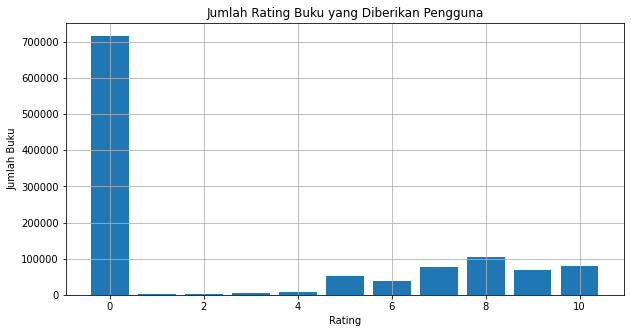

In [19]:
rating_counter = ratings.groupby('Book-Rating').count()
plt.figure(figsize=(10,5))
plt.title('Jumlah Rating Buku yang Diberikan Pengguna')
plt.xlabel('Rating')
plt.ylabel('Jumlah Buku')
plt.bar(rating_counter.index, rating_counter['ISBN'])
plt.grid(True)
plt.show()

Dapat dilihat pada bar chart bahwa terjadi ke tidak seimbangan pada data, jika hal ini tidak diatasi maka akan berpengaruh terhadap performa model nantinya. oleh karna itu kita akan melakukan Data Preparation terlebih dahulu

# **Data Preparation**

Sebelum data dimasukan ke dalam model, data harus melalui tahap Data Preparation terlebih dahulu agar data dapat diterima baik oleh model. berikut teknik yang digunakan :

## **Mengatasi data yang tidak seimbang**

Pada bar chart di atas dapat diketahui bahwa data tidak seimbang dan banyak pengguna yang memberikan rating 0, oleh karna itu kita akan menghapus data dengan rating 0

In [20]:
ratings.drop(ratings[ratings["Book-Rating"] == 0].index, inplace=True)
ratings

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6
...,...,...,...
1149773,276704,0806917695,5
1149775,276704,1563526298,9
1149777,276709,0515107662,10
1149778,276721,0590442449,10


Setelah data dengan `Book-Rating` 0 dihapus jumlah data yang tersedia yaitu 433.671.

Mari plot data mengunakan bar chart lagi, apakah data sudah lebih baik dari sebelumnya

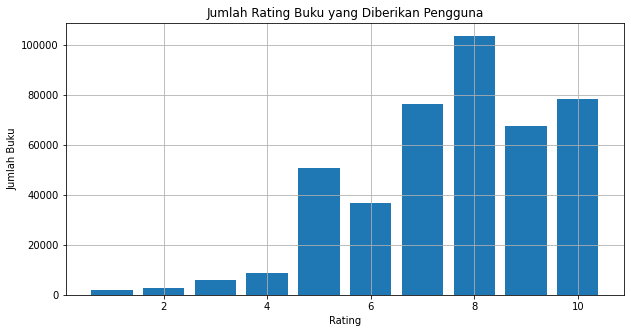

In [21]:
rating_counter = ratings.groupby('Book-Rating').count()
plt.figure(figsize=(10,5))
plt.title('Jumlah Rating Buku yang Diberikan Pengguna')
plt.xlabel('Rating')
plt.ylabel('Jumlah Buku')
plt.bar(rating_counter.index, rating_counter['ISBN'])
plt.grid(True)
plt.show()

## **Encoding Data**

Encoding dilakukan untuk menyandikan `User-ID` dan `ISBN` ke dalam indeks integer

In [22]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = ratings['User-ID'].unique().tolist()
 
# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
 
# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [23]:
# Mengubah ISBN menjadi list tanpa nilai yang sama
isbn_list = ratings['ISBN'].unique().tolist()
 
# Melakukan encoding ISBN
isbn_to_isbn_encoded = {x: i for i, x in enumerate(isbn_list)}
 
# Melakukan proses encoding angka ke ISBN
isbn_encoded_to_isbn = {i: x for i, x in enumerate(isbn_list)}

Setelah itu hasil dari encoding akan dimapping ke dataframe `ratings`

In [24]:
# Mapping userID ke dataframe user
ratings['user'] = ratings['User-ID'].map(user_to_user_encoded)

# Mapping ISBN ke dataframe book
ratings['book'] = ratings['ISBN'].map(isbn_to_isbn_encoded)

ratings

,User-ID,ISBN,Book-Rating,user,book
1,276726,0155061224,5,0,0
3,276729,052165615X,3,1,1
4,276729,0521795028,6,1,2
6,276736,3257224281,8,2,3
7,276737,0600570967,6,3,4
...,...,...,...,...,...
1149773,276704,0806917695,5,77801,185971
1149775,276704,1563526298,9,77801,121200
1149777,276709,0515107662,10,77802,23986
1149778,276721,0590442449,10,77803,151038


Sekarang dataset `ratings` mempunya 5 kolom yaitu `User-ID`, `ISBN`, `Book-Rating`, `user`, dan `book`

In [25]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433671 entries, 1 to 1149779
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User-ID      433671 non-null  int64 
 1   ISBN         433671 non-null  object
 2   Book-Rating  433671 non-null  int64 
 3   user         433671 non-null  int64 
 4   book         433671 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 19.9+ MB


## **Randomize Dataset**

Pada tahap ini kita akan mengacak datanya terlebih dahulu agar distribusinya menjadi random.

In [26]:
# Mengacak dataset
df = ratings.sample(frac=1, random_state=42)
df

,User-ID,ISBN,Book-Rating,user,book
144846,32440,0380018179,8,9713,1013
211411,49144,8422641127,5,14390,54663
647520,156424,3442453844,7,44370,127953
30124,7125,0060586125,8,2587,10359
1052982,251606,0316789844,8,70897,7053
...,...,...,...,...,...
658592,159834,0441132456,7,45235,70428
958724,231613,0747542333,5,65186,33018
335707,79923,0440206154,8,22993,6822
373697,89610,8880891960,5,25753,84887


## **Data Standardization and Splitting**

Setelah datanya diacak, lakukan standarisasi nilai rating yang sebelumnya berada di rentang 0 hingga 10 kini diubah ke rentang 0 hingga 1 untuk mempermudah dalam proses training

In [27]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)
 
# Mendapatkan jumlah resto
num_isbn = len(isbn_encoded_to_isbn)
print(num_isbn)
 
# Mengubah rating menjadi nilai float
df['Book-Rating'] = df['Book-Rating'].values.astype(np.float32)
 
# Nilai minimum Book-Rating
min_rating = min(df['Book-Rating'])
 
# Nilai maksimal Book-Rating
max_rating = max(df['Book-Rating'])
 
print('Number of User: {}, Number of ISBN: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_isbn, min_rating, max_rating
))

77805
185973
Number of User: 77805, Number of ISBN: 185973, Min Rating: 1.0, Max Rating: 10.0


## **Membagi Data untuk Training dan Validasi**

kemudian dataset dibagi menjadi 2 bagian, yaitu data yang akan digunakan untuk melatih model (sebesar 90%) dan data untuk memvalidasi model (sebesar 10%).

In [28]:
# Membuat variabel x untuk mencocokkan data user dan book menjadi satu value
x = df[['user', 'book']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 90% data train dan 10% data validasi
train_indices = int(0.9 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[  9713   1013]
 [ 14390  54663]
 [ 44370 127953]
 ...
 [ 22993   6822]
 [ 25753  84887]
 [ 21414  43793]] [0.77777778 0.44444444 0.66666667 ... 0.77777778 0.44444444 0.77777778]


Data telah siap untuk dimasukkan ke dalam model.

# **Model Development**

## **Membuat Kelas RecommenderNet**

In [29]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_isbn, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_isbn = num_isbn
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.book_embedding = layers.Embedding( # layer embeddings book
        num_isbn,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_isbn, 1) # layer embedding book bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    book_vector = self.book_embedding(inputs[:, 1]) # memanggil layer embedding 3
    book_bias = self.book_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_book = tf.tensordot(user_vector, book_vector, 2) 
 
    x = dot_user_book + user_bias + book_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

## **Hyperparameter Tuning**

Agar mendapatkan hasil model yang optimal, maka dalam proyek ini menggunakan bantuan library `optuna` untuk melakukan hyperparameter tuning atau pencarian nilai hyperparameter yang terbaik, dalam hal ini adalah nilai `embedding_size`.

In [30]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 7.5 MB/s 
     |████████████████████████████████| 209 kB 52.1 MB/s 
     |████████████████████████████████| 81 kB 10.1 MB/s 
     |████████████████████████████████| 78 kB 7.7 MB/s 
     |████████████████████████████████| 50 kB 6.9 MB/s 
     |████████████████████████████████| 147 kB 67.2 MB/s 
     |████████████████████████████████| 112 kB 60.0 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=31b307375e0cde903b619f788f5a020fa58d524f9e34de6560ae7dd20ad7da43
  Stored in directory: /root/.cache/pip/wheels/7f/1a/65/84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip


In [31]:
import optuna
def objective(trial):
    tf.keras.backend.clear_session()
    model = RecommenderNet(num_users=num_users, num_isbn=num_isbn, embedding_size=trial.suggest_int('embedding_size', 1, 15))

    # model compile
    model.compile(
        loss = tf.keras.losses.BinaryCrossentropy(),
        optimizer = keras.optimizers.Adam(learning_rate=0.001),
        metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )

    model.fit(
        x = x_train,
        y = y_train,
        batch_size=200,
        epochs = 1,
        validation_data = (x_val, y_val)
    )
    
    y_pred= model.predict(x_val)

    return mean_squared_error(y_val, y_pred, squared=False)

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=15, timeout=500)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2022-12-06 13:48:00,217] A new study created in memory with name: no-name-417b586a-50ac-43a1-9385-e8f463da18cb


1356/1356 [==============================] - 2s 2ms/step


[I 2022-12-06 13:49:29,281] Trial 0 finished with value: 0.2528092154308398 and parameters: {'embedding_size': 7}. Best is trial 0 with value: 0.2528092154308398.


1356/1356 [==============================] - 3s 2ms/step


[I 2022-12-06 13:50:55,408] Trial 1 finished with value: 0.2544897014565508 and parameters: {'embedding_size': 7}. Best is trial 0 with value: 0.2528092154308398.


1356/1356 [==============================] - 3s 2ms/step


[I 2022-12-06 13:51:23,591] Trial 2 finished with value: 0.24821190361923556 and parameters: {'embedding_size': 1}. Best is trial 2 with value: 0.24821190361923556.


1356/1356 [==============================] - 2s 2ms/step


[I 2022-12-06 13:52:36,897] Trial 3 finished with value: 0.2543703456931793 and parameters: {'embedding_size': 10}. Best is trial 2 with value: 0.24821190361923556.


1356/1356 [==============================] - 3s 2ms/step


[I 2022-12-06 13:53:52,230] Trial 4 finished with value: 0.2539467889508239 and parameters: {'embedding_size': 10}. Best is trial 2 with value: 0.24821190361923556.


1356/1356 [==============================] - 2s 2ms/step


[I 2022-12-06 13:54:43,459] Trial 5 finished with value: 0.2520139367492116 and parameters: {'embedding_size': 5}. Best is trial 2 with value: 0.24821190361923556.


1356/1356 [==============================] - 3s 2ms/step


[I 2022-12-06 13:55:34,986] Trial 6 finished with value: 0.25426362988894124 and parameters: {'embedding_size': 6}. Best is trial 2 with value: 0.24821190361923556.


1356/1356 [==============================] - 3s 2ms/step


[I 2022-12-06 13:57:03,475] Trial 7 finished with value: 0.25325991827189626 and parameters: {'embedding_size': 9}. Best is trial 2 with value: 0.24821190361923556.


Number of finished trials: 8
Best trial:
  Value: 0.24821190361923556
  Params: 
    embedding_size: 1


Hasil hypermeter turning menunjukan bahwa nilai `embedding_size` yang paling optimal yaitu 1

Model ini menggunakan Binary Crossentropy untuk menghitung loss function, Adam (Adaptive Moment Estimation) sebagai optimizer, dan root mean squared error (RMSE) sebagai metrics evaluation. 

In [32]:
tf.keras.backend.clear_session()

# Menerapkan nilai parameter paling optimal dari optuna
BEST_EMBEDDING_SIZE = 1

model = RecommenderNet(num_users, num_isbn, BEST_EMBEDDING_SIZE)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

## **Training Model**

In [34]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size=64,
    epochs = 10,
    validation_data = (x_val, y_val)
)

Epoch 1/10
6099/6099 [==============================] - 61s 10ms/step - loss: 0.6325 - root_mean_squared_error: 0.2587 - val_loss: 0.5791 - val_root_mean_squared_error: 0.2047
Epoch 2/10
6099/6099 [==============================] - 63s 10ms/step - loss: 0.5626 - root_mean_squared_error: 0.1873 - val_loss: 0.5653 - val_root_mean_squared_error: 0.1905
Epoch 3/10
6099/6099 [==============================] - 59s 10ms/step - loss: 0.5524 - root_mean_squared_error: 0.1765 - val_loss: 0.5612 - val_root_mean_squared_error: 0.1865
Epoch 4/10
6099/6099 [==============================] - 62s 10ms/step - loss: 0.5461 - root_mean_squared_error: 0.1695 - val_loss: 0.5593 - val_root_mean_squared_error: 0.1847
Epoch 5/10
6099/6099 [==============================] - 66s 11ms/step - loss: 0.5416 - root_mean_squared_error: 0.1644 - val_loss: 0.5583 - val_root_mean_squared_error: 0.1838
Epoch 6/10
6099/6099 [==============================] - 62s 10ms/step - loss: 0.5378 - root_mean_squared_error: 0.1600 -

# **Evaluasi**

## **Visualisasi Metrik**

Untuk melihat visualisasi proses training, mari kita plot metrik evaluasi dengan matplotlib.

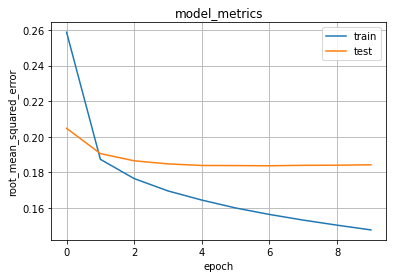

In [35]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.grid(True)
plt.show()

Perhatikanlah, Dari proses ini, kita memperoleh nilai error akhir sebesar sekitar 0.14 dan error pada data validasi sebesar 0.18. Nilai tersebut cukup bagus untuk sistem rekomendasi. Mari kita cek, apakah model ini bisa membuat rekomendasi dengan baik?

## **Mendapatkan Rekomendasi**

Untuk mendapatkan rekomendasi buku, pertama kita ambil sampel user secara acak dan definisikan variabel book_not_read yang merupakan daftar buku yang belum pernah dikunjungi oleh pengguna. Anda mungkin bertanya-tanya, mengapa kita perlu menentukan daftar book_not_read? Hal ini karena daftar book_not_read inilah yang akan menjadi buku yang kita rekomendasikan.

Sebelumnya, pengguna telah memberi rating pada beberapa buku yang telah mereka kunjungi. Kita menggunakan rating ini untuk membuat rekomendasi buku yang mungkin cocok untuk pengguna. Nah, buku yang akan direkomendasikan tentulah buku yang belum pernah dikunjungi oleh pengguna. Oleh karena itu, kita perlu membuat variabel book_not_read sebagai daftar buku untuk direkomendasikan pada pengguna.

Variabel book_not_read diperoleh dengan menggunakan operator bitwise (~) pada variabel book_read_by_user.

In [36]:
books_df = books
df = pd.read_csv('Ratings.csv')
 
# Mengambil sample user
user_id = df['User-ID'].sample(1).iloc[0]
book_read_by_user = df[df['User-ID'] == user_id]
 
# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html 
book_not_read = books_df[~books_df['ISBN'].isin(book_read_by_user.ISBN.values)]['ISBN']
book_not_read = list(
    set(book_not_read)
    .intersection(set(isbn_to_isbn_encoded.keys()))
)
 
book_not_read = [[isbn_to_isbn_encoded.get(x)] for x in book_not_read]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_read), book_not_read)
)

Selanjutnya, untuk memperoleh rekomendasi buku, gunakan fungsi model.predict() dari library Keras

In [37]:
ratings = model.predict(user_book_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_isbns = [
    isbn_encoded_to_isbn.get(book_not_read[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Books with high ratings from user')
print('----' * 8)
 
top_book_user = (
    book_read_by_user.sort_values(
        by = 'Book-Rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)
 
book_df_rows = books_df[books_df['ISBN'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    print(row._3, "-", row._2)
 
print('----' * 8)
print('Top 10 book recommendation')
print('----' * 8)
 
recommended_books = books_df[books_df['ISBN'].isin(recommended_book_isbns)]
for row in recommended_books.itertuples():
    print(row._3, "-", row._2)

4680/4680 [==============================] - 8s 2ms/step
Showing recommendations for users: 155027
Books with high ratings from user
--------------------------------
Jerry Beck - Looney Tunes and Merrie Melodies: A Complete Illustrated Guide to the Warner Bros. Cartoons
Debra Baycura - Patchwork Math 2 (Grades 4-6)
L. Frank Baum - Oz-story 6
A. A. Milne - Winnie-The-Pooh and Some Bees (Dutton Easy Reader)
Esther Averill - Jenny and the Cat Club: A Collection of Favorite Stories About Jenny Linsky (New York Review Children's Collection)
--------------------------------
Top 10 book recommendation
--------------------------------
J.R.R. TOLKIEN - The Return of the King (The Lord of the Rings, Part 3)
Dr. Seuss - Fox in Socks (I Can Read It All by Myself Beginner Books)
J. R. R. Tolkien - The Return of the King (The Lord of The Rings, Part 3)
J. R. R. Tolkien - The Two Towers (The Lord of the Rings, Part 2)
Shel Silverstein - The Giving Tree
Bill Watterson - Calvin and Hobbes
Jodi Picoult 

hasil di atas adalah rekomendasi untuk user dengan id 155027. Dari output tersebut, kita dapat membandingkan antara buku dengan rating tertinggi dari user dan Top 10 buku recommendation untuk user. 